# Introductory applied machine learning (INFR10069)
# Assignment 4: Unsupervised Learning Part B (PCA)

<div align="right"><font color="blue" size="5">Your Score was 47.0 out of a total of 61.0, or 77.0%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 4 and deals with the MNIST Dataset - Part A deals with the 20 Newsgroup dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. The Jupyter Notebook for Part A, *and*
 1. This Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A and Part B (this notebook) are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [43]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.cross_validation import train_test_split, KFold
from sklearn import linear_model, decomposition, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


## Description of the dataset

In this part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance.

### Description of the Data

This MNIST Dataset is a collection of handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Exploration of the dataset

As in part A, we will automatically download the data we will be using. Execute the cell below, which will download the data, and also output a textual description of the dataset, which you should read. The more interested reader may also look at the official [documentation](http://yann.lecun.com/exdb/mnist/) (note that this is a preprocessed version of the original dataset mentioned in that link).

**Do not change any of the code in this cell.**

In [3]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 1.1 --- [9 marks] ==========

Let us start by familiarising ourselves with the dataset. Note that digits is a python `dict`: we have already used one of its entries (`DESCR`) to get the description above. If you execute `digits.keys()`, you'll see another 4 fields. We will focus our analysis on the `data` and `target` arrays. Occasionally, it may be useful to refer to the `images` field, which is the same as `data` but reshaped to 8x8 images rather than flattened.

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the `data` and `target` arrays. This should be no more than a few lines of code. *Hint: you may find it helpful to transform the `data` to a Pandas DataFrame.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). (<5 sentences)<br>

<div align="right"><font color="blue" size="4">7.0/9.0</font></div>

In [14]:
#(a) # Your Code goes here:
X = pd.DataFrame(digits['data'])
y=digits.target
display(data.head(3))
print('DATA/FEATURES PROPERTIES')
print('Summary Statistics:')
display(data.describe())
print('Basic information:')
display(data.info())
print('Data/Features shape:')
display(data.shape)
print()
print('LABELS/y PROPERTIES')
print('Range of (distinct) Values:')
display(np.unique(y))
print('Shape')
display(y.shape)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


DATA/FEATURES PROPERTIES
Summary Statistics:


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    

None

Data/Features shape:


(1797, 64)


LABELS/y PROPERTIES
Range of (distinct) Values:


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Shape


(1797,)

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">you should print the count of the target for each class</font></div>

(b) ***Your answer goes here:***
The dimensions of the dataset are `(1797,64)` for the data (`X`) and `(1797,)` for the labels (`y`) so the dimensionality of the data and the target matches.
<br>The 1797 rows represent 1797 different *scanned handwritten digit 32x32 images/bitmaps*, each of which has *64* blocks of *4x4 pixel regions*(features) and 1 target column (separated in the `y` variable, containing the *true digit* for that image). <br>Each *(row,column)* entry in the data represents the **strength** of the black color(how much the pixel is 'on' in *that* pixel region in *that* document. <br>The range of values that an entry can take is from 0.0 to 16.0 (float numbers), but **some pixel region blocks/features** do **not** take many values from that range (examples blocks 0,8,56 etc.) 
For example **block `0`** has all values `0.0`, which might indicate that it is a *redundant* region/feature **or** that *handwritten bitmaps* actually **never contain** 'written' pixels in that region (although this may indicate that we can **reduce** the dimensions even further.) 
<br>The target column/vector(populated `y` Series variable) can take a range of values from 0 to 9, which we can see with numpy's *unique* method above, indicating that the *true labels* are the numerical digits from 0 to 9 inclusive, as expected. 




<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">describe the distribution of the target class</font></div>

### ========== Question 1.2 --- [12 marks] ==========

In order to better interpret the values, we will analyse the standard deviation of the data.

&nbsp;&nbsp;**(a)** [Code] Compute the Standard Deviation over the entire mnist dataset as well as on a per-digit basis. Plot the standard-deviations as 8x8 images (you can use `sns.heatmap()`). *Hint: you may find Pandas' [grouping](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) functionality useful.*<br>
&nbsp;&nbsp;**(b)** [Text] Bearing in mind the way in which PCA reduces dimensionality, comment on the relative importance of the 64 dimensions with respect to PCA dimensionality reduction. (1 sentence)<br>
&nbsp;&nbsp;**(c)** [Text] Does the level of standard deviation indicate whether a dimension is important or not for classification? Explain. (4-5 sentences) *Hint: It may be useful to refer to both the global as well as the per-digit visualisations.*

<div align="right"><font color="blue" size="4">9.0/12.0</font></div>

Text(0.5,1,'Standard Deviation of the whole dataset')

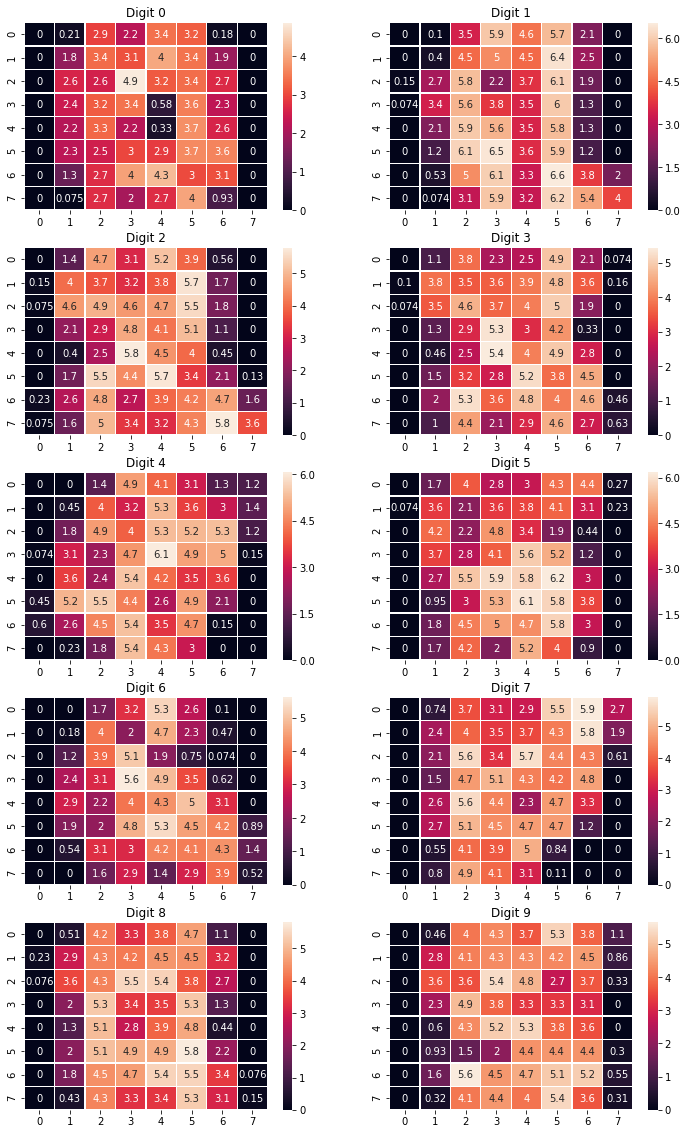

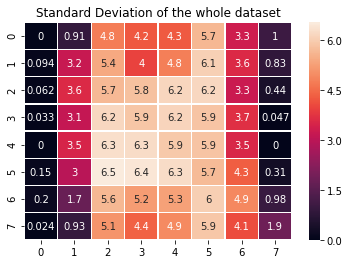

In [24]:
#(a) # Your Code goes here:
std=data.describe().loc['std'].values.reshape(8,8) #calculate the std for the WHOLE dataset(reshaped to 8x8 for plotting)
stds_per_digit = data.groupby(target).std().values #take the stds (only values) values PER digit.

reshaped_per_digit=np.ndarray((10,8,8)) #create an array of 10 8x8 matrices to store the reshaped stds_per_digit as 8x8 images.

for i in range(10): #for 10 digits positions [0..9]
    reshaped_per_digit[i] = stds_per_digit[i].reshape((8,8)) #populate that position of the array with the relevant std_per_digit

fig,axes = plt.subplots(5, 2, figsize=(12,20)) #create subplots with axes for the 10 digits (5x2 figure)

for ax,digit in zip(axes.flat, range(10)): #for loop to create a heatmap for each std_per_digit 8x8 image (flattened axes for loop to work easily)
    sns.heatmap(reshaped_per_digit[digit], ax=ax, annot=True, linewidths=.3)
    ax.set_title('Digit {}'.format(digit) )
    
fig2,ax2= plt.subplots() #create another subplot for the heatmap of std for the WHOLE dataset

ax2=sns.heatmap(std,annot=True, linewidths=.3)
ax2.set_title('Standard Deviation of the whole dataset')

<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

(b) ***Your answer goes here:***
Some dimensions are less important than others and can be removed/reduced by taking the rest(the "important") dimensions with PCA because some dimensions have a low variance in the data and PCA keeps *only* the dimensions that contribute the most variance to the data(the Principal Components).

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">PCA extracts relevant dimensions by prefering the directions of maximum variance and hence the ordering depends on the variance in that dimension</font></div>

(c) ***Your answer goes here:***
PCA operates mainly on the dimensions that have the *highest variance on the data*(and ignores/removes the rest), because those are the dimensions that contribute to the data having the most variations and **therefore making it distinguishable into classes**. Therefore the *level of standard deviation* actually defines if a dimension is *useful* in classification or not.
<br>But we have to inspect *both* the *total* standard deviation dimensions and the dimensions' stds **per digit**  to see which dimensions are really important (or really not important and we can hence remove them/reduce the dimensions with PCA), because a dimension might *not be that important* (low standard deviation) for the *whole dataset*, but that region might be **very important** for a *specific digit*. 
<br>For example dimension/pixel region `7` or else `(0,6)` ) is not that important for the total dataset (std=3.3), but is *crucial* to identify the *corner* of a **digit 7**(std=5.9 and indeed the highest for that digit), hence the high standard deviation for that digit. 

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">describe how the non-zero(especially those small values) std values and mean values in per-digit classes affects the classification and the performance of the classifier after applying PCA</font></div>

## 2. Dimensionality Reduction

### ========== Question 2.1 --- [16 marks] ==========

Let us visualise the explained variance by the PCA components. Familiarise yourself with the [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) class in SKLearn.

&nbsp;&nbsp;**(a)** [Code] Using SKLearn's `PCA` object, transform the MNIST `data` into orthogonal (PCA) components, retaining **all** dimensions (set `n_components` appropriately). Set `svd_solver='full'` and keep all other parameters at default values. Then plot the *percentage* variance explained by each dimension as a `bar`-graph, in descending order of variance. *Hint: see the `explained_variance_ratio_` attribute of the PCA object.* On the same graph, plot (line) the cumululative explained variance as you add components (again in descending order of variance explained). Indicate the point at which 80% of the variance is explained (e.g. using matplotlib's [`vlines()`](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.vlines.html)): label the number of components at this point (e.g. in the Legend). Make sure to distinguish between the plots and label them appropriately.<br>&nbsp;&nbsp;*Tip: you may need to use [`twinx()`](https://matplotlib.org/2.2.3/gallery/api/two_scales.html#sphx-glr-gallery-api-two-scales-py) to better combine the two plots. Also, for consistency, number components starting from 0.* <br>
&nbsp;&nbsp;**(b)** [Text] By commenting on the shape of the plot, why do you think 80% of the variance seems like a reasonable threshold? *Hint: Think about why we do PCA*. (<3 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] What can you say about the number of components required to explain 80% of the variance? (<4 sentences)

<div align="right"><font color="blue" size="4">11.0/16.0</font></div>

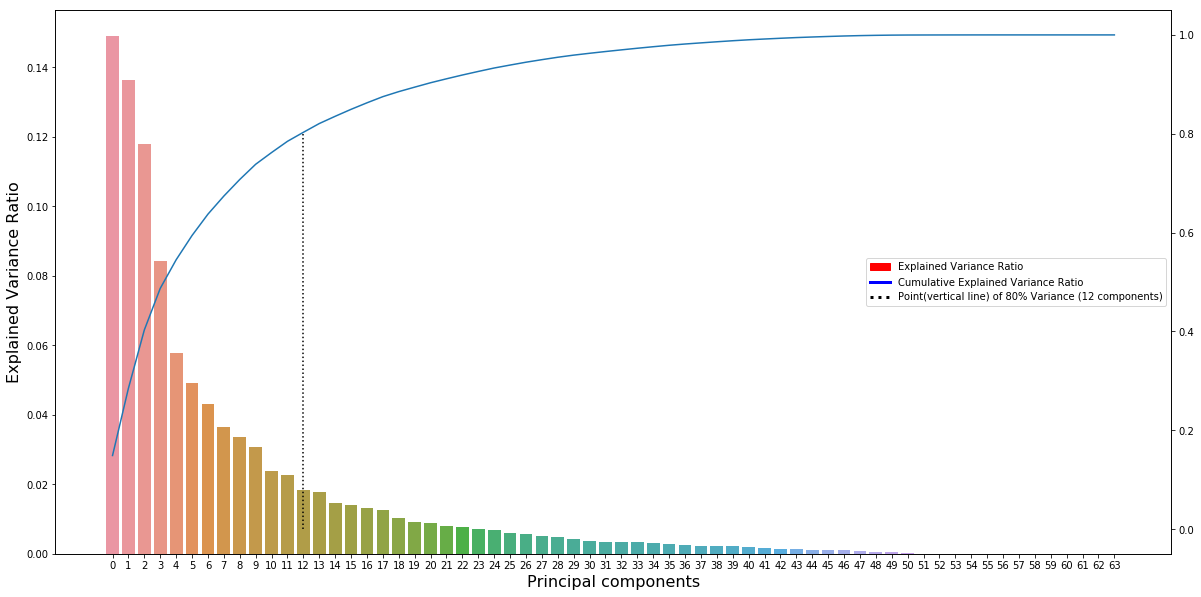

In [59]:
#(a) # Your Code goes here:
pca = PCA(n_components=64,svd_solver='full') 
pca.fit(X)
vratios=pca.explained_variance_ratio_

plt.rcParams['figure.figsize']= (20,10)
dimrange=np.arange(64)
sns.barplot(x=dimrange,y=vratios)
plt.xlabel('Principal components',fontsize=16)
plt.ylabel('Explained Variance Ratio',fontsize=16)

cumvar=np.cumsum(vratios) #calculate the cumulative explained variance ratios distribution (curve)
points=np.where(csum>=0.8) #populate all points that are >= to 80% of the cumulative explained variance
points_array=np.asarray(points) #convert the points to a 2d array
point=points_array[0,0] #the first point (nearest to equal to 80%)

lineplot=plt.twinx() #second plot ( vertical line) in the same figure for the point where 80% of variance is explained using twinx()
lineplot.vlines(x=point,ymin=0,ymax=0.8,linestyle=':') #plot the vertical line (dashed),setting a limit of where the line stops

cumvar_plot=plt.plot(dimrange,cumvar) #plot the cumulative explained ratios line (curve)

#populate custom legend elements for the 3 plots (barplot,cumvar line and point vertical dashed line)
legend_elements = [patches.Patch(color='red', label='Explained Variance Ratio'),
    Line2D([0], [0], lw=3, color='blue', label='Cumulative Explained Variance Ratio'),
    Line2D([0], [0], lw=3, color='black',linestyle=':',label='Point(vertical line) of 80% Variance ({} components)'.format(point))
                  ]
#plot the customised legend
plt.legend(handles=legend_elements,loc='right')

<div align="right"><font color="blue" size="4">8.0</font></div>

<div align="left"><font color="green" size="4">label the axis and the correct number of the components(should be 13)</font></div>

(b) ***Your answer goes here:***
<br>The shape of the barplot (explained variance ratios) decreases almost like an *asymptotic curve* with respect to the principal components. The cumulative EVR increases in a similar trend(sensible as it is the added total of the *explained variance ratio* (EVR) up to that point). <br><br>80% of the variance is an appropriate threshold, as the explained variances for components *after* the 12th are not that significant (need approximately **10 additional components** for 10% more EVRs), and we already have included 80% of the EVRs, which is satisfactory. 
<br> <br>Including more components (for a higher EVR percentage) would defeat the whole purpose of PCA, which is reducing the dimensionality of the dataset to deal with less dimensions and make classification simpler.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

(c) ***Your answer goes here:***
<br>12 components are needed to explain 80% of the variance , which means that only 12 pixel regions(the *most important* in *descending EVR* as chosen by PCA) are *important* for the variation and distinction of the data in the dataset, hence identifying the true digit of the bitmap.   <br> This is sensible as most digits, regardless of handwriting style, have some central/critical regions that can solely identify that digit.  <br><br>This occurs in real world as well, with the example of pencil-written numbers which might be slightly erased or smudged, but some of the handwritten digit's areas still hint to us the number which we can identify with certainty.  
<br>The rest pixel regions don't contribute much more, probably most of them being the "dead" areas, containing whitespace in most digits.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">mention that 13/64 components is still larger than the number of classes and explain why</font></div>

### ========== Question 2.2 --- [10 marks] ==========

Let us attempt to visualise the Principal Components.

&nbsp;&nbsp;**(a)** [Code] Use heatmap (set `cmap='binary'`) to visualise the first 3 principal components in the original 8x8 space. Label the plots and chose the colour range carefully. Also plot the mean value. *Hint: You should have 4 figures. Use the `components_`/`mean_` attributes of the `PCA` object you created.* <br>
&nbsp;&nbsp;**(b)** [Text] By making reference to the above plots, interpret the principal components and the mean. In your discussion (< 5 sentences) you should indicate what in general a principal component shows, how it relates to the original space and how the specific components (and mean) you visualised apply to our data.

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

Text(0.5,1,'Mean value')

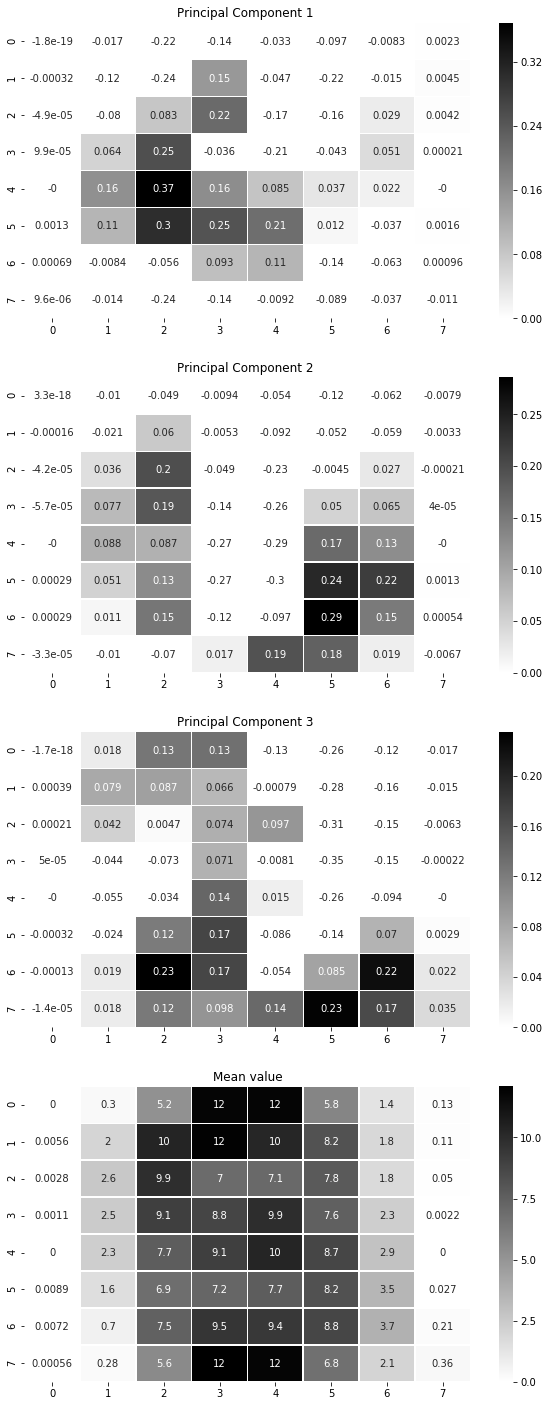

In [90]:
#(a) # Your Code goes here:
components=pca.components_

components_reshaped=np.ndarray((3,8,8)) #create an array of 3 8x8 matrices to store the reshaped Principalcomponents as 8x8 images.

comprange=range(3) #the range of the components
for i in comprange:
    components_reshaped[i] = components[i].reshape((8,8)) #populate the array with the reshaped component images

fig,axes = plt.subplots(4, 1, figsize=(10,25)) #create 4 subplots to have all 3 component plots & mean plot under same figure

for ax,component in zip(axes.flat, comprange):#for each component plot in one axis from the subplots sequentially
    sns.heatmap(components_reshaped[component], ax=ax, annot=True, linewidths=.3,cmap='binary',vmin=0) #plotting the heatmap
    #taking care to set the minimum of the COLOR RANGE to zero, as we don't want negative variances shown in grey.
    ax.set_title('Principal Component {} '.format(component+1)) #added +1 to have 1st instead of 0th component etc.

#reshape the mean value too    
mean_reshaped=pca.mean_.reshape(8,8)
#use the final subplot to plot the mean
sns.heatmap(mean_reshaped, ax=axes[3], annot=True, linewidths=.5,cmap='binary',vmin=0)
axes[3].set_title('Mean value')

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">setting vmin/vmax correctly for component graphs</font></div>

(b) ***Your answer goes here:***
<br>PCA takes an **orthogonal** *linear transformation* of the data and projects it into a new space(coordinate system) with *lower dimension* than the original space, such that the *greatest variance* of the data is projected on the *first coordinate(called the first **principal component**) of that new space* by that transformation, the second greatest variance on the second coordinate (second principal component) and so on.
<br>Hence, the first principal component (with all principal components being *orthogonal to the original space* of course), defines the pixel regions that contribute to the greatest variance in the data, which is sensible given that those regions are commonly 'on' for the majority of digits.
<br>The second principal component includes pixel regions which contribute a little less to the explained variance of the data, with pixel regions that are usually used to distinguish between the round and cornered numbers (e.g. `3,8,0` - `1,7,4`)
<br>The third principal component includes pixel regions which seem to contribute even less to the explained variance, with pixel regions that seem to distinguish between the numbers `1` and `2`.
<br> The mean value of all principal components just takes *all* the pixel regions from *all* principal components and calculates their mean, which means the regions shown above are *all* regions which contribute well on the variance of the data *on average*, hence we can see *all important regions*, with the most important being the centre columns where the handwritten digits usually reside. 

<div align="right"><font color="blue" size="4">5.0</font></div>

<div align="left"><font color="green" size="4">describe the mean by referencing from the graph</font></div>

### ========== Question 2.3 --- [14 marks] ==========

We now want to explore what these principal components (eigen-vectors) capture about the data. To do this, we will first project the data onto the PCA space, and then reconstruct it using successively more dimensions (eigen-vectors). To save us time, we will do this for the first image (`digits.data[0,:]`) which should itself be a 0.

&nbsp;&nbsp;**(a)** [Code] Let us first verify that PCA is indeed an invertible transform. Using heatmaps similarly to the previous question, display the original digit. Using the PCA object's `transform` method, project this into the PCA space, and then reconstruct the original digit by multiplying each dimension with the projection value. Show the reconstructed digit, and also print the Mean Absolute Differences (MAD) between the two. *Tip: the MAD should be 0 - if it is not, you may be forgetting to add something...* Label everything appropriately.<br>
&nbsp;&nbsp;&nbsp;*Hint: the PCA `transform` requires a 2D array, with the samples along the rows...*<br>
&nbsp;&nbsp;**(b)** [Code] Now we can analyse the quality of the reconstruction as we include more components. For the same digit, plot the reconstruction with `[0, 1, 2, 5, 15, 30]` components. For each reconstruction, compute and print (within the plot title) the MAD between the reconstruction and the original value.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the observations in the figures. How many components does it take to reconstruct the digit in a way that it is recogniseable?

<div align="right"><font color="blue" size="4">12.0/14.0</font></div>

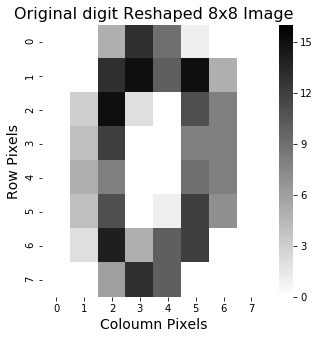

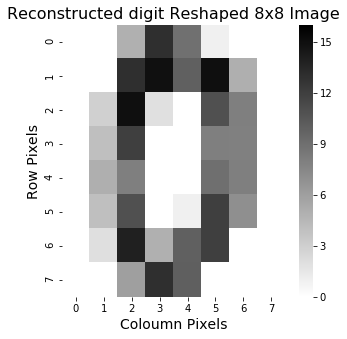

Mean Absolute Difference:   0.0


In [112]:
#(a) # Your Code goes here:
# Reconsruct with Principal Components
fig = plt.figure(figsize=(5,5))
original = digits.data[0,:].reshape((8,8)) #original first digit, reshaped to an 8x8 image
ax = sns.heatmap(origin, cmap='binary', vmin=0, vmax=16) #heatmap for the digit, with range 0..16 as that's the range of values each region can take
ax.set_title('Original digit Reshaped 8x8 Image', fontsize = 16)
ax.set_xlabel('Coloumn Pixels', fontsize = 14)
ax.set_ylabel('Row Pixels', fontsize = 14)
plt.show()  
 

reconstructed = pca.mean_.copy()
 
for c in range(len(pca.components_)): # for each component in the range of pca's components
    proj = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()[c] #calculate the projection value for the current component
    reconstructed = reconstructed + (proj * pca.components_[c]) #add to the reconstruction the current component scaled by its projection value

fig = plt.figure(figsize=(5,5))
re_origin = reconstructed.reshape((8,8)) #reshape the reconstructed digit to 8x8 image
ax = sns.heatmap(re_origin, cmap='binary', vmin=0, vmax=16 ) #plot the heatmap for the reconstructed image
ax.set_title('Reconstructed digit Reshaped 8x8 Image', fontsize = 16)
ax.set_xlabel('Coloumn Pixels', fontsize = 14)
ax.set_ylabel('Row Pixels', fontsize = 14)
plt.show()  
 

mad = np.mean(np.abs(reconstructed-digits.data[0,:])) #calculate the MAD between the (before reshapes) reconstructed digit and the original 
print('Mean Absolute Difference:  ',round(mad,14))#zero MAD rounded to 14 dp as stated in PIAZZA
    

<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">set to be square</font></div>

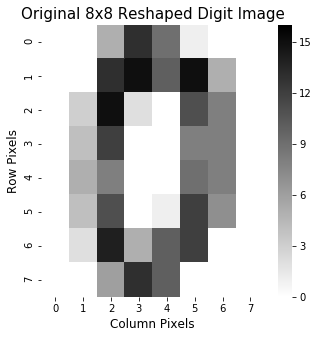

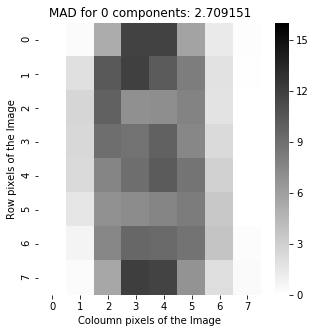

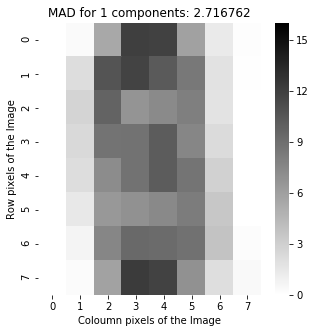

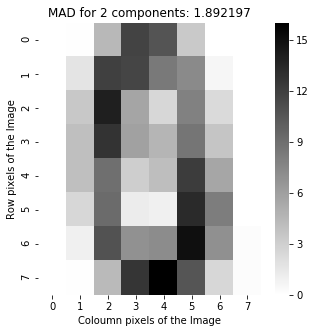

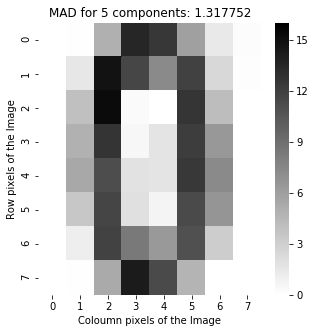

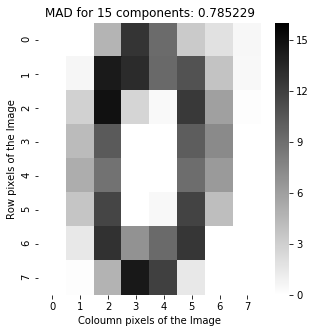

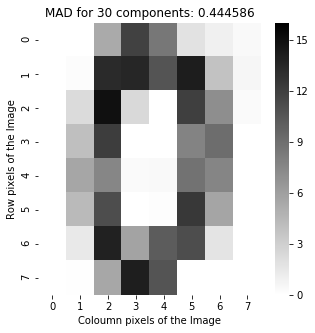

In [111]:
#(b) # Your Code goes here:
fig = plt.figure(figsize=(5,5))
original_reshaped = digits.data[0,:].reshape((8,8)) #take the first digit and construct the original digit 8x8 reshaped image 
ax = sns.heatmap(original_reshaped, cmap='binary', vmin=0, vmax=16) #construct a heatmap with the range (0,16) that pixel blocks can take.
ax.set_title('Original 8x8 Reshaped Digit Image', fontsize = 15)
ax.set_ylabel('Row Pixels', fontsize = 12)
ax.set_xlabel('Column Pixels', fontsize = 12)

plt.show()

test_components = [0, 1, 2, 5, 15, 30] #the different number of components we will be testing
for test in test_components:
    reconstruct_2 = pca.mean_.copy() #copy the PCA mean to begin reconstructing the original digit
 
    for component in range(test): #for each component in the number/range of components we're testing
        #apply the same code as the previous cell
        proj_value = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()[component] 
        reconstruct_2 = reconstruct_2 + proj_value * pca.components_[component] 

   
    mad_2 = np.mean(np.abs(reconstruct_2-digits.data[0,:])) #for each test number of components, calculate the MAD
    fig = plt.figure(figsize=(5,5))
    re_origin_2 = reconstruct_2.reshape((8,8))
    ax = sns.heatmap(re_origin_2, cmap='binary', vmin=0,vmax=16 )
    ax.set_title('MAD for {} components: {}'.format(test,round(mad_2,6))) #output the MAD for the current number of components tested
    ax.set_xlabel('Coloumn pixels of the Image')
    ax.set_ylabel('Row pixels of the Image')
    plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

(c) ***Your answer goes here:***
<br>Surprisingly, the MAD for 0 components is lower than for 1 component, but is still *very large* to see a similarity of the reconstructed to the original digit (seems like a `9` rather than a `0`. For 2 components and over (from our testing no. of components list), the MAD steadily decreases and the reconstructed image becomes more and more recognisable, with *wrong* grey areas becoming whiter and *right* grey areas becoming darker, *converging towards the original digit as the no. of components increase* .
<br> One could argue that the image is recognisable from 2 components and up, but the high MAD and grey central areas suggest uncertainty, so the correct number of components from which we can recognise the reconstructed digit thereafter is **`5`**

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">describe and explain why the mad increases from 0 component to 1 component and 5 components to recognise</font></div>

### ========== Question 2.4 --- (LEVEL 11) --- [18 marks] ==========

We will now investigate the effect PCA has on classification performance. Specifically we want to analyse whether the PCA transformation improves the performance of (i) an SVM and (ii) a Naive-Bayes classifier. We will use **5-Fold Cross-Validation** to evaluate our models using the mean accuracy provided by the `score` method of the classifiers in SKLearn. 

*N.B.: To ensure repeatability, set the `random_state=0` where applicable, and use the same KFold object (`shuffle=True`) throughout.*

&nbsp;&nbsp;**(a)** [Code] Train an SVM classifier ([`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html)) with a linear kernel (keep all other parameters at defaults), first on the raw digit data, and then on the PCA-transformed data, **keeping all components**. Report the mean accuracy over folds in each case.<br>
&nbsp;&nbsp;**(b)** [Code] Now train a `NaiveBayes` classifier with default parameters in a similar manner (on raw and PCA-transformed data). Think carefully, and explain using programming comments, about which type of `NaiveBayes` implementation is applicable in this scenario, keeping in mind that we should use the same type for the Raw and PCA training. Again report the fold-averaged accuracy `score`.<br>
&nbsp;&nbsp;**(c)** [Text] What effect did PCA have on each of these classifiers? By referring to the theory behind each classifier type, explain why this is.

In [30]:
#(a) # Your Code goes here:

In [31]:
#(b) # Your Code goes here:

(c) ***Your answer goes here:***